In [44]:
import pandas as pd
pd.set_option("max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import re
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [45]:
train = pd.read_csv('train.csv')
test = pd.read_csv('Test.csv')

In [46]:
train.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [47]:
def RemoveSpaces(df):
    df = df.copy()
    df["content"] = df['content'].str.lstrip()
    df["content"] = df['content'].str.rstrip()
    return df    

In [48]:
train = RemoveSpaces(train)
test = RemoveSpaces(test)

In [49]:
train.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani ...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesitis...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote za...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet imei...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu ...,Kitaifa


In [50]:
test.head()

,swahili_id,content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,"MKUU wa Wilaya ya Bahi, Mkoani Dodoma, Mwanaha..."
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,"MWISHONI mwa wiki hii, Timu ya Soka ya Taifa, ..."
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,THAMANI ya mauzo ya bidhaa za Afrika Mashariki...
3,00868eeee349e286303706ef0ffd851f39708d37,MENEJA Mawasiliano na Utetezi wa asasi ya AGPA...
4,00a5cb12d3058dcf2e42f277eee599992db32412,"WAZIRI wa Kilimo, Japhet Hasunga amesema serik..."


In [51]:
train["category"].value_counts()

Kitaifa      2000
michezo      1720
Biashara     1360
Kimataifa      54
Burudani       17
Name: category, dtype: int64

In [52]:
 train.isna().sum().sum()

0

In [53]:
Category_Odering = ["Kitaifa","michezo","Biashara","Kimataifa","Burudani"]
train["category"] = train["category"].apply(lambda x: Category_Odering.index(x))

In [54]:
train = train.drop(["id"], axis=1)

In [55]:
test["content"] = test["content"].str.lstrip()
test["content"] = test["content"].str.rstrip()
test = test.drop(["swahili_id"], axis=1)

In [56]:
def PreprocessContents(content):
    new_train = train.copy()
    new_train = content.lower()
    new_train = re.sub(r"@\w+","", new_train)
    new_train = re.sub(r"#","", new_train)
    new_train = re.sub(r"https\S+","", new_train)
    new_train = re.sub(r"[^a-z0-9\s]","", new_train) 
    new_train = re.sub(r"[0-9]+","number", new_train)
    new_train = new_train.split(" ")
    new_train = list(map(lambda x: x.strip(), new_train))
    if " " in new_train:
        new_train = content.remove(" ")
    new_train = [word for word in new_train if word not in stop_words]     
    return new_train

In [57]:
import nltk
from NoelNLP import stopList
stop_words = stopList()
print(stop_words)

['na', 'lakini', 'ingawa', 'ingawaje', 'kwa', 'sababu', 'hadi', 'hata', 'kama', 'ambapo', 'ambamo', 'ambako', 'ambacho', 'ambao', 'ambaye', 'ilhali', 'ya', 'yake', 'yao', 'yangu', 'yetu', 'yenu', 'vya', 'vyao', 'vyake', 'vyangu', 'vyenu', 'vyetu', 'yako', 'hizo', 'mimi', 'sisi', 'wewe', 'nyinyi', 'yeye', 'wao', 'nao', 'nasi', 'nanyi', 'ni', 'alikuwa', 'atakuwa', 'hii', 'hizi', 'zile', 'ile', 'hivi', 'vile', 'za', 'zake', 'zao', 'zenu', 'kwenye', 'katika', 'kwao', 'kwenu', 'kwetu', 'dhidi', 'kati', 'miongoni', 'katikati', 'wakati', 'kabla', 'baada', 'baadaye', 'nje', 'tena', 'mbali', 'halafu', 'hapa', 'pale', 'mara', 'yoyote', 'wowote', 'chochote', 'vyovyote', 'yeyote', 'lolote', 'mwenye', 'mwenyewe', 'lenyewe', 'lenye', 'wote', 'lote', 'vyote', 'nyote', 'kila', 'zaidi', 'hapana', 'ndiyo', 'au', 'ama', 'sio', 'siye', 'tu', 'budi', 'nyingi', 'nyingine', 'wengine', 'mwingine', 'zingine', 'lingine', 'kingine', 'chote', 'sasa', 'basi', 'bila', 'cha', 'chini', 'hapo', 'huku', 'kule', 'humu',

In [58]:
new_train = train["content"].apply(PreprocessContents)

In [59]:
new_train.head()

0    [serikali, imesema, haitakuwa, tayari, kuona, ...
1    [mkuu, mkoa, tabora, aggrey, mwanri, amesitish...
2    [serikali, imetoa, miezi, sita, taasisi, zote,...
3    [kampuni, mchezo, kubahatisha, mbet, imeingia,...
4    [watanzania, wamekumbushwa, kusherehekea, siku...
Name: content, dtype: object

In [60]:
test = test["content"].apply(PreprocessContents)

In [61]:
test

0       [mkuu, wilaya, bahi, mkoani, dodoma, mwanahami...
1       [mwishoni, wiki, timu, soka, taifa, taifa, sta...
2       [thamani, mauzo, bidhaa, afrika, mashariki, um...
3       [meneja, mawasiliano, utetezi, asasi, agpahi, ...
4       [waziri, kilimo, japhet, hasunga, amesema, ser...
                              ...                        
1283    [mkurugenzi, msaidizi, msajili, asasi, kirai, ...
1284    [kilomoni, jana, kesho, atazungumzia, suala, h...
1285    [timu, taifa, soka, tanzania, bara, kilimanjar...
1286    [yanga, imetozwa, faini, sh, number, kutokana,...
1287    [mahakama, kuu, kanda, dar, es, salaam, imekub...
Name: content, Length: 1288, dtype: object

In [62]:
lables = np.array(train["category"])

In [63]:
lables

array([0, 2, 0, ..., 0, 0, 2], dtype=int64)

In [64]:
#Get Vocabulary
vocabulary = set()

for content in new_train:
    for word in content:
        if word not in vocabulary:
            vocabulary.add(word)
vocab_length = len(vocabulary)

#Get Max Length of a sequence
max_seq_length = 0

for content in new_train:
    if len(content) > max_seq_length:
        max_seq_length = len(content)
        
#Print Results
print("Vocab Length:", vocab_length )
print("Max_seq_length:", max_seq_length )

Vocab Length: 98024
Max_seq_length: 1638


In [65]:
tokenizer = Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(new_train)
tokenizer.fit_on_texts(test)


sequences = tokenizer.texts_to_sequences(new_train)
test_sequences = tokenizer.texts_to_sequences(test)
word_index = tokenizer.word_index


model_inputs = pad_sequences(sequences, maxlen=max_seq_length, padding="post")
test_inputs = pad_sequences(test_sequences, maxlen=max_seq_length, padding="post")



In [66]:
#word_index

In [135]:
Train = pd.DataFrame(model_inputs)

In [137]:
Train

0      1      2      3     4      5     6     7      8      9      10    \
0        3    752   3604     89   224    469  1598     7  41514  12086    680   
1       11     32    354   2916  2828  17554  2829   110     76    396    328   
2        3    949    404    203    96     81   284   100  21199    171  10181   
3       41     12   3426  27428  3206    502  2180     6    114    552   1472   
4      116  27429   2716   1674  2957   6108   469   434    656   6879      7   
...    ...    ...    ...    ...   ...    ...   ...   ...    ...    ...    ...   
5146    19    160     75   6549  7875    763   126     2     96  25239   2163   
5147   631  37433  26124   5052  1163   1155   651  2645      7     27    669   
5148   709   1297   2894      1   131   6318    33     1    709      1      1   
5149  2220    263     67  34591    59    633   332   993    931     88   5241   
5150   274   4750    974    502    10     20   967    26      7    142     26   

      11     12    13    14    15     16     17     18     19     20     21    \
0      434     28  1634   186   757   3550   3102  41515   1302    286     26   
1     2917    559    69    35    32  27416   1901     71   2829  41524  41525   
2      924     15    17  2474   570  12087  12088   4814  17555   8401    328   
3      969     30   718   103   207     13     77   4476   2180     20   1555   
4      409    115    23  7208   121    440   5353    157    297  41547     45   
...    ...    ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
5146  5052  26556     5     7  5167     66    314    684    798   5052      2   
5147  1091    101  1105   767   174   1150    651     24  40677   1907    147   
5148     2      1   709     1     1    112   1753   5105      2      1    154   
5149   629    710   281  9340    71    183   2054     59    642    281     51   
5150    11    753   122     3   665    868   4670    125   1113    395    811   

       22    23    24     25     26    27    28    29     30     31    32    \
0       144     7  2827   4813   3303  1635  1367    46     83   1224    85   
1       228   753    32  21195   8399  1163   769   110     94    423  3425   
2     41532   169     2   1231    171    20    85   286    228     11    78   
3       190   322   331  27428  11052  4696  3675   349      6   6878   205   
4      2588  1674  2382   3207   6109   606  1983  3753  11054  17558  2586   
...     ...   ...   ...    ...    ...   ...   ...   ...    ...    ...   ...   
5146   7061    21    22   7758    176   752     5  1284     17     66   798   
5147    157    15     2      1    629    20    26    79    542    676    72   
5148     18   600  2894  27245    253    78   149    56    131    826   141   
5149   1880   810  3283   2334    960    26  1012    67    286     26    93   
5150    132     8    58    125   1534    45    93   440   1331   2607  3870   

       33     34     35     36     37    38     39     40     41    42    \
0        21     22     34  27410    110    96   3424    101     63  5698   
1     41526    187  41527  41528  27417   349  27418   1715  41529    43   
2        15    337     51  41533   6876   570   2441    460    329   785   
3        88  17557      6    155     65   340    825    598     37    29   
4      5091   8903   2382   3207  15239  7962    683    469   7209  2586   
...     ...    ...    ...    ...    ...   ...    ...    ...    ...   ...   
5146    397    108  16557     28    486    75    581   2173    397   155   
5147     51   1550    781   1700     78   480      8  40678    631  1552   
5148   1121  19779   2894     33      1  1121      1      1    131     2   
5149    832    416   1453   1279   4881   633    316  38626    623   678   
5150     30    433    132      8   1283  1331   2234   2414    170    31   

      43    44     45     46     47     48     49     50     51     52    \
0     7962   469    166  21193     26     43   2109    381      3    305   
1     2828   559      8    449  13464  41530  

In [68]:
model_inputs

array([[   3,  752, 3604, ...,    0,    0,    0],
       [  11,   32,  354, ...,    0,    0,    0],
       [   3,  949,  404, ...,    0,    0,    0],
       ...,
       [ 709, 1297, 2894, ...,    0,    0,    0],
       [2220,  263,   67, ...,    0,    0,    0],
       [ 274, 4750,  974, ...,    0,    0,    0]])

Class=0, n=2000 (20.000%)
Class=2, n=2000 (20.000%)
Class=1, n=2000 (20.000%)
Class=3, n=2000 (20.000%)
Class=4, n=2000 (20.000%)


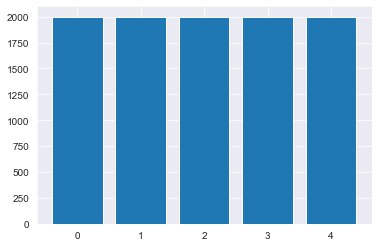

In [69]:
from matplotlib import pyplot
# Oversampling
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(model_inputs, lables)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [70]:
X.shape

(10000, 1638)

# Training

In [71]:
model_inputs.shape

(5151, 1638)

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import plot_model

In [73]:
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz

In [74]:
embedding_dim=64

inputs = tf.keras.Input(shape=(max_seq_length,))
embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=embedding_dim,
    input_length=max_seq_length
)(inputs)

#Model A
flatten = tf.keras.layers.Flatten()(embedding)

#Model B 
gru = tf.keras.layers.GRU(units=embedding_dim)(embedding)
gru_flatten = tf.keras.layers.Flatten()(gru)

#Bot A & B
concat = tf.keras.layers.concatenate([flatten,gru_flatten])

outputs = tf.keras.layers.Dense(5, activation="softmax")(concat)



model = tf.keras.Model(inputs, outputs)

tf.keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [75]:
#from sklearn.linear_model import LogisticRegression

In [131]:
from sklearn.model_selection import KFold

In [ ]:
#accs = []
#f1s = []

kf = KFold(n_splits=5)

for train_idx, test_idx in kf.split(Train):
    X_train = X.iloc[Train, :]
    X_test = X.iloc[Train, :]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    
    #model = build_pipeline()
    #model.fit(X_train, y_train)
    
    #y_pred = model.predict(X_test)
    
    #accs.append(accuracy_score(y_test, y_pred))
    #f1s.append(f1_score(y_test, y_pred, pos_label=1.0))

#acc = np.mean(accs)
#f1 = np.mean(f1s)

#print("Accuracy: {:.2f}%".format(acc * 100))
#print("F1-Score: {:.5f}".format(f1))

In [76]:
X_train,X_test, y_train,y_test  = train_test_split(X, y, train_size=0.7, random_state=77)

In [77]:
X_train

array([[ 2834,  5512,    93, ...,     0,     0,     0],
       [    3, 53651, 10262, ...,     0,     0,     0],
       [   96,   653,   409, ...,     0,     0,     0],
       ...,
       [  336, 17294,  2580, ...,     0,     0,     0],
       [    6,    18,   797, ...,     0,     0,     0],
       [ 4575, 68201,   748, ...,     0,     0,     0]])

In [110]:
inputs = tf.keras.Input(shape=(max_seq_length,))
embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=embedding_dim,
    input_length=max_seq_length
)(inputs)


#Model A
flatten = tf.keras.layers.Flatten()(embedding)
dense_1 = tf.keras.layers.Dropout(0.5)(flatten)
dense_2 = tf.keras.layers.Dropout(0.5)(dense_1)

#Model B 
gru = tf.keras.layers.GRU(units=embedding_dim)(embedding)
gru_flatten1 = tf.keras.layers.Dropout(0.5)(gru)
gru_flatten_2 = tf.keras.layers.Dropout(0.5)(gru_flatten1)



#Both A & B
concat = tf.keras.layers.concatenate([dense_2,gru_flatten_2])
concat1 = tf.keras.layers.Dropout(0.5)(concat)
outputs = tf.keras.layers.Dense(5, activation="softmax")(concat1)



model = tf.keras.Model(inputs, outputs)

tf.keras.utils.plot_model(model)


('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [111]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
batch_size=4
epochs=10

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/10
1400/1400 [==============================] - 1368s 975ms/step - loss: 1.1429 - accuracy: 0.5296 - val_loss: 0.8331 - val_accuracy: 0.6829
Epoch 2/10
1400/1400 [==============================] - 1384s 989ms/step - loss: 0.5950 - accuracy: 0.7898 - val_loss: 0.6359 - val_accuracy: 0.7729
Epoch 3/10
1400/1400 [==============================] - 60821s 43s/step - loss: 0.3357 - accuracy: 0.8888 - val_loss: 0.5678 - val_accuracy: 0.7979
Epoch 4/10
1400/1400 [==============================] - 1326s 947ms/step - loss: 0.2014 - accuracy: 0.9339 - val_loss: 0.5572 - val_accuracy: 0.8207
Epoch 5/10
1400/1400 [==============================] - 1224s 874ms/step - loss: 0.1493 - accuracy: 0.9521 - val_loss: 0.5447 - val_accuracy: 0.8221
Epoch 6/10
1400/1400 [==============================] - 1346s 961ms/step - loss: 0.1151 - accuracy: 0.9629 - val_loss: 0.5202 - val_accuracy: 0.8457
Epoch 7/10
1400/1400 [==============================] - 1254s 895ms/step - loss: 0.0992 - accuracy: 0.9654 

In [112]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 29s 301ms/step - loss: 0.7837 - accuracy: 0.7843


[0.7836602926254272, 0.784333348274231]

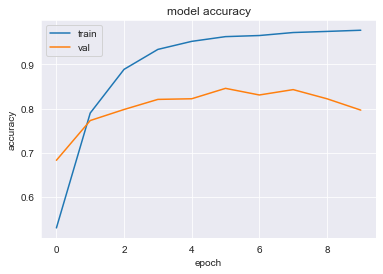

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

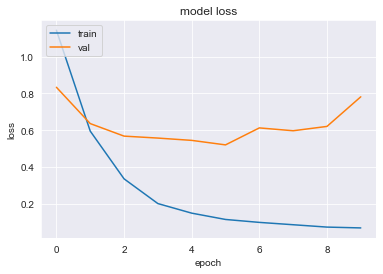

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

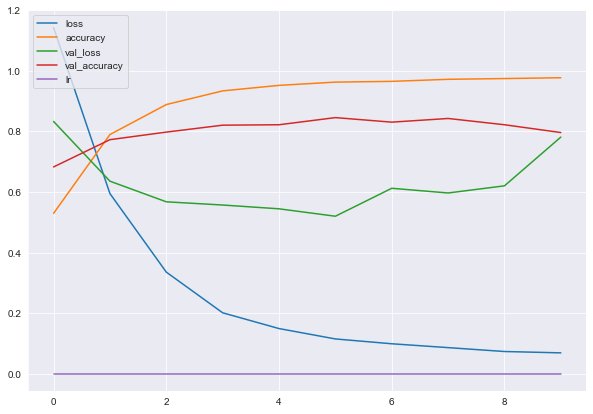

In [115]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

In [116]:
X_Test_Preds = model.predict(X_test)

In [117]:
X_Test_Preds

array([[7.5885293e-04, 1.6264542e-03, 6.9754076e-04, 5.3776156e-02,
        9.4314098e-01],
       [6.7708719e-01, 1.5502883e-05, 3.2277471e-01, 8.7472297e-05,
        3.5125780e-05],
       [3.8252535e-04, 3.1161449e-05, 1.8888284e-05, 5.7867088e-05,
        9.9950957e-01],
       ...,
       [1.2170427e-02, 9.4675201e-01, 2.5652161e-02, 9.5851049e-03,
        5.8402396e-03],
       [2.3774922e-04, 1.5827893e-06, 3.0991521e-06, 1.3729885e-05,
        9.9974388e-01],
       [9.7183585e-01, 8.1398403e-03, 5.4284181e-05, 1.9836124e-02,
        1.3382293e-04]], dtype=float32)

In [118]:
from sklearn.metrics import confusion_matrix, classification_report

In [121]:
mapping = dict(enumerate(train['category'].unique()))
LABEL_MAPPING = {value: key for key, value in mapping.items()}
LABEL_MAPPING

{0: 0, 2: 1, 1: 2, 3: 3, 4: 4}

In [122]:
NUM_CLASSES = len(LABEL_MAPPING)
print("# of classes:", NUM_CLASSES)

# of classes: 5


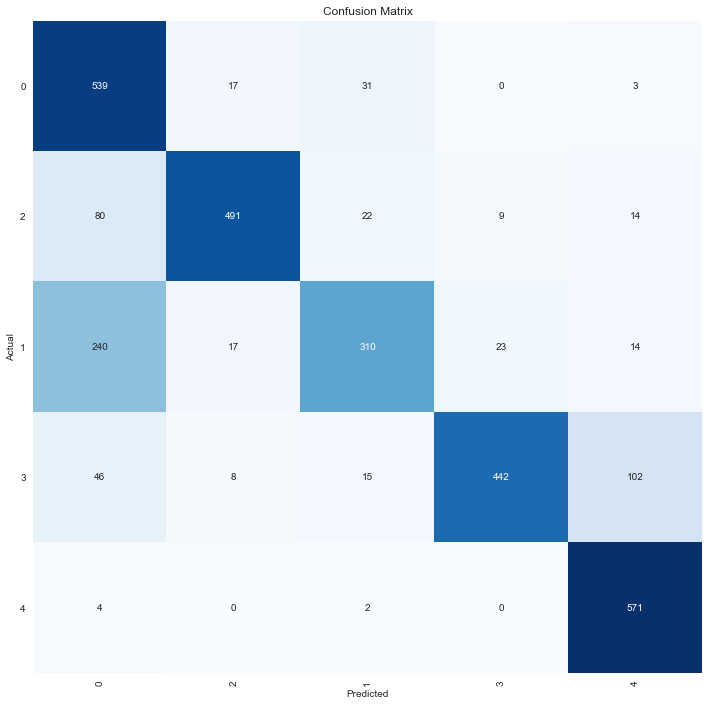

In [123]:
y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
#clr = classification_report(y_test, y_pred, target_names=list(LABEL_MAPPING.keys()))

plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(NUM_CLASSES) + 0.5, labels=list(LABEL_MAPPING.keys()), rotation=90)
plt.yticks(ticks=np.arange(NUM_CLASSES) + 0.5, labels=list(LABEL_MAPPING.keys()), rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [124]:
#clr = classification_report(y_test, y_pred, target_names=list(LABEL_MAPPING.keys()))

In [125]:
#clr = classification_report(y_test, y_pred, target_names=list(LABEL_MAPPING.keys()))

In [126]:
#print("Classification Report:\n----------------------\n", clr)

In [127]:
sub = pd.read_csv('SampleSubmission.csv')

In [128]:
sub

,swahili_id,kitaifa,michezo,biashara,kimataifa,burudani
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,0,0,0,0,0
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,0,0,0,0,0
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,0,0,0,0,0
3,00868eeee349e286303706ef0ffd851f39708d37,0,0,0,0,0
4,00a5cb12d3058dcf2e42f277eee599992db32412,0,0,0,0,0
...,...,...,...,...,...,...
1283,feb4b0ae88524c9cee3e50f2301d84a235f3c607,0,0,0,0,0
1284,fecf3f14f47237e02721ed4baa4eb6c11abd239f,0,0,0,0,0
1285,feed09e13586d12139cd59bc20996a4d29706606,0,0,0,0,0
1286,ffc0bca6fde8fa0cce1ac3a7b0d746603d441bf8,0,0,0,0,0


In [129]:
TestPreds = model.predict(test_inputs)

In [97]:
Test_Preds = pd.DataFrame(TestPreds)

In [98]:
Test_Preds

,0,1,2,3,4
0,9.887006e-01,0.000110,0.011043,0.000146,5.975807e-09
1,6.873886e-07,0.999994,0.000004,0.000001,6.181997e-08
2,1.178784e-01,0.000281,0.881553,0.000039,2.484542e-04
3,4.632295e-01,0.059061,0.229569,0.248008,1.324554e-04
4,9.589863e-01,0.000089,0.039616,0.001309,1.004400e-07
...,...,...,...,...,...
1283,9.743983e-01,0.004275,0.018032,0.003284,9.560306e-06
1284,1.273418e-04,0.999696,0.000056,0.000118,2.053876e-06
1285,4.788353e-05,0.999919,0.000020,0.000013,1.560903e-07
1286,7.856706e-03,0.991902,0.000216,0.000025,5.233232e-08


In [99]:
Test_Preds = Test_Preds.set_axis(['Kitaifa', 'michezo', 'Biashara', 'Kimataifa', 'Burudani'], axis=1)

In [100]:
Test_Preds

,Kitaifa,michezo,Biashara,Kimataifa,Burudani
0,9.887006e-01,0.000110,0.011043,0.000146,5.975807e-09
1,6.873886e-07,0.999994,0.000004,0.000001,6.181997e-08
2,1.178784e-01,0.000281,0.881553,0.000039,2.484542e-04
3,4.632295e-01,0.059061,0.229569,0.248008,1.324554e-04
4,9.589863e-01,0.000089,0.039616,0.001309,1.004400e-07
...,...,...,...,...,...
1283,9.743983e-01,0.004275,0.018032,0.003284,9.560306e-06
1284,1.273418e-04,0.999696,0.000056,0.000118,2.053876e-06
1285,4.788353e-05,0.999919,0.000020,0.000013,1.560903e-07
1286,7.856706e-03,0.991902,0.000216,0.000025,5.233232e-08


In [101]:
submission = pd.concat([sub["swahili_id"],Test_Preds], axis=1)

In [102]:
submission

,swahili_id,Kitaifa,michezo,Biashara,Kimataifa,Burudani
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,9.887006e-01,0.000110,0.011043,0.000146,5.975807e-09
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,6.873886e-07,0.999994,0.000004,0.000001,6.181997e-08
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,1.178784e-01,0.000281,0.881553,0.000039,2.484542e-04
3,00868eeee349e286303706ef0ffd851f39708d37,4.632295e-01,0.059061,0.229569,0.248008,1.324554e-04
4,00a5cb12d3058dcf2e42f277eee599992db32412,9.589863e-01,0.000089,0.039616,0.001309,1.004400e-07
...,...,...,...,...,...,...
1283,feb4b0ae88524c9cee3e50f2301d84a235f3c607,9.743983e-01,0.004275,0.018032,0.003284,9.560306e-06
1284,fecf3f14f47237e02721ed4baa4eb6c11abd239f,1.273418e-04,0.999696,0.000056,0.000118,2.053876e-06
1285,feed09e13586d12139cd59bc20996a4d29706606,4.788353e-05,0.999919,0.000020,0.000013,1.560903e-07
1286,ffc0bca6fde8fa0cce1ac3a7b0d746603d441bf8,7.856706e-03,0.991902,0.000216,0.000025,5.233232e-08


In [103]:
submission.to_csv('SwahiliNewsPreds23.csv', index=False)

In [ ]:
m = np.zeros_like(Test_Preds.values)
m[np.arange(len(Test_Preds)), Test_Preds.values.argmax(1)] = 1

df1 = pd.DataFrame(m, columns = Test_Preds.columns).astype(int)

In [ ]:
df1

In [ ]:
submission = pd.concat([sub["swahili_id"],df1], axis=1)

In [ ]:
submission

In [ ]:
submission.to_csv('SwahiliNewsPreds07.csv', index=False)